In [2]:
import torch
import numpy as np

from custom_classes import Save_Output


In [3]:
model_old = torch.load('models/basic_model2')

In [4]:
repr(model_old)

'Sequential(\n  (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))\n  (1): ReLU()\n  (2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))\n  (3): ReLU()\n  (4): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))\n  (5): ReLU()\n  (6): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)\n  (7): Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1))\n  (8): ReLU()\n  (9): Flatten(start_dim=1, end_dim=-1)\n  (10): Linear(in_features=289, out_features=10, bias=True)\n)'

In [5]:
model_new = torch.nn.Sequential()
layers = []
for layer, child in enumerate(model_old.children()):
    filename = "layer_" + str(layer) + ".csv"
    model_new  = torch.nn.Sequential(
        model_new,
        Save_Output(filename),
        child
    )
    layers.append(str(child))

In [6]:
repr(model_new)

'Sequential(\n  (0): Sequential(\n    (0): Sequential(\n      (0): Sequential(\n        (0): Sequential(\n          (0): Sequential(\n            (0): Sequential(\n              (0): Sequential(\n                (0): Sequential(\n                  (0): Sequential(\n                    (0): Sequential(\n                      (0): Sequential()\n                      (1): Save_Output()\n                      (2): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))\n                    )\n                    (1): Save_Output()\n                    (2): ReLU()\n                  )\n                  (1): Save_Output()\n                  (2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))\n                )\n                (1): Save_Output()\n                (2): ReLU()\n              )\n              (1): Save_Output()\n              (2): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))\n            )\n            (1): Save_Output()\n            (2): ReLU()\n          )\n          (1): Save_

In [7]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

C:\Users\trist\anaconda3\envs\env_torch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\trist\anaconda3\envs\env_torch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [8]:
IMAGE_SIZE = 64
#Generates an object to store multiple transformations

composed = transforms.Compose(
    [transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
    ])

In [9]:
#Creating the two dataset objects and applying our transformations from above

dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
  
dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

In [10]:
#Data Loader for training data
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

#Data Loader for validation data
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [11]:
model = model_old
correct=0
N_test=len(dataset_val)

#Put model into validation mode (turns off Dropout if there are Dropout layers)
model.eval()
for x_test, y_test in test_loader:
    #Make a prediction
    z = model(x_test)
    #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
    y_hat = torch.argmax(z, 1)
    #Update correct counter if the prediction was correct
    correct += (y_hat == y_test).sum().item()
accuracy = correct / N_test
print("Validation accuracy: " + str(accuracy))

Validation accuracy: 0.8414


In [12]:
model = model_new
correct=0
N_test=len(dataset_val)

#Put model into validation mode (turns off Dropout if there are Dropout layers)
model.eval()
for x_test, y_test in test_loader:
    #Make a prediction
    z = model(x_test)
    #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
    y_hat = torch.argmax(z, 1)
    #Update correct counter if the prediction was correct
    correct += (y_hat == y_test).sum().item()
accuracy = correct / N_test
print("Validation accuracy: " + str(accuracy))

Validation accuracy: 0.8414


In [13]:
files = []
for i in range(len(layers)):
    filename = "layer_" + str(i) +".csv"
    files.append(open(filename, 'r'))

data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [14]:
import pandas as pd
# my_data = {}
# for index, values in enumerate(data):
#     name = "layer " + str(index)
#     my_data[name] = np.array(values).mean()

new_data = [np.array(i).mean() for i in data]

df = pd.DataFrame(new_data)

Text(0, 0.5, 'sparcity')

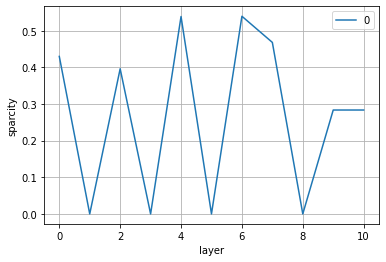

In [15]:
import matplotlib.pyplot as plt
df.plot()
plt.grid()
plt.xlabel("layer")
plt.ylabel("sparcity")


In [16]:
import os
for file in files:
    file.close()
    os.remove(file.name)

In [17]:
df = pd.DataFrame(new_data, index=layers)

In [18]:
df

,0
"Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))",0.429789
ReLU(),0.000000
"Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))",0.396135
ReLU(),0.000000
"Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))",0.538690
ReLU(),0.000000
"MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)",0.539453
"Conv2d(5, 1, kernel_size=(3, 3), stride=(1, 1))",0.468058
ReLU(),0.000000
"Flatten(start_dim=1, end_dim=-1)",0.283542


In [19]:
print(len(layers))

11


In [20]:
model_new.eval()

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Sequential(
        (0): Sequential(
          (0): Sequential(
            (0): Sequential(
              (0): Sequential(
                (0): Sequential(
                  (0): Sequential(
                    (0): Sequential(
                      (0): Sequential()
                      (1): Save_Output()
                      (2): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))
                    )
                    (1): Save_Output()
                    (2): ReLU()
                  )
                  (1): Save_Output()
                  (2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1))
                )
                (1): Save_Output()
                (2): ReLU()
              )
              (1): Save_Output()
              (2): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))
            )
            (1): Save_Output()
            (2): ReLU()
          )
          (1): Save_Output()
          (2): MaxPool